# Ford Gobike Data Visualization
## by Abdulganiyu Salaudeen

## Investigation Overview


> In this investigation of the Ford GoBike System, I want to look at subscriber behaviors and characteristics, specifically how user type, time, gender, and age impacts usage of the system.  


## Dataset Overview

> Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose. 

>Ford GoBike System Dateset is a dateset that contains trip data from Ford bike service for public use. The data consisted of trip duration and other attributes of approximately 183,412 datas. attributes including start time and end time with date, start station and end station names, start and end coordinates, customer type, year of birth and gender

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('bike_master_clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173642 entries, 0 to 173641
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             173642 non-null  int64  
 1   start_time               173642 non-null  object 
 2   end_time                 173642 non-null  object 
 3   start_station_id         173449 non-null  float64
 4   start_station_name       173449 non-null  object 
 5   start_station_latitude   173642 non-null  float64
 6   start_station_longitude  173642 non-null  float64
 7   end_station_id           173449 non-null  float64
 8   end_station_name         173449 non-null  object 
 9   end_station_latitude     173642 non-null  float64
 10  end_station_longitude    173642 non-null  float64
 11  bike_id                  173642 non-null  int64  
 12  user_type                173642 non-null  object 
 13  member_birth_year        173642 non-null  int64  
 14  memb

In [4]:
# change the data types to correct formate
df.duration_minute = df.duration_minute.astype(int)
df.member_age = df.member_age.astype(int)
df.start_day = df.start_day.astype('category')
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Bike Trip Duration vs The Type of User

* The figure below shows that Customers are more likely to take long trip duration, while Subscribers are likely to take short trip duration.Which indicates that Customers tends to spend more trip time with the bike compare to Subscriber. 



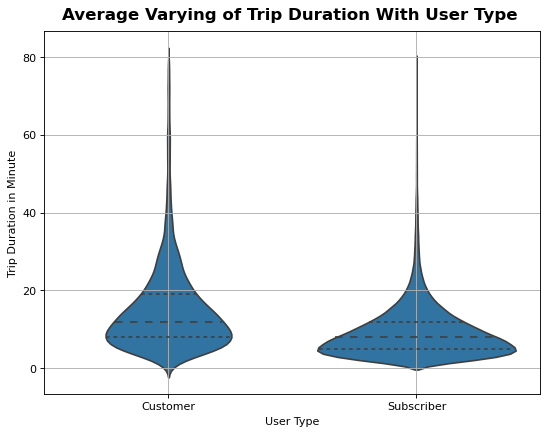

In [5]:
fig=plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')

color = sb.color_palette()[0]
#plotting a volin plot
sb.violinplot(data=df, x='user_type', y='duration_minute',
              color= color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');
plt.title('Average Varying of Trip Duration With User Type ',fontsize=15,
             fontweight='semibold', y=1.015);
plt.grid()

## Duration Covered vs User Type vs Gender

* The Heatmap below dpicts the average trip duration by gender and user. from the figure, the Customers tend to take loner trip duration unlike the Subcribers. 
* The figure also shows that Female gender tend to take long trip duration than Male and Othher gender.

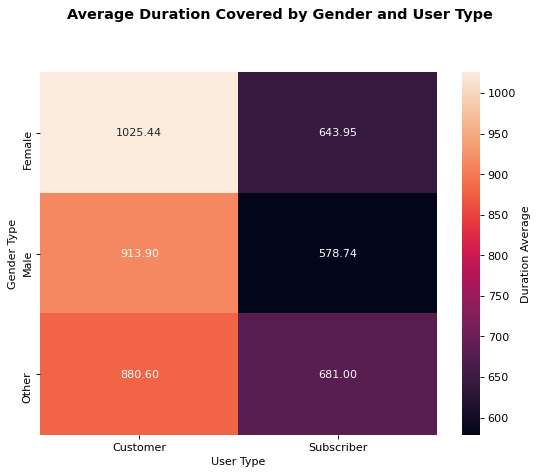

In [6]:
fig=plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')

avg_dis= df.groupby(['member_gender', 'user_type']).mean()['duration_sec']
avg_dis = avg_dis.reset_index(name = 'avg_duration')
avg_dis = avg_dis.pivot(index = 'member_gender', columns = 'user_type',
                            values = 'avg_duration')
sb.heatmap(avg_dis, annot = True, fmt = '.2f',
           cbar_kws = {'label' : 'Duration Average'});

plt.xlabel('User Type');
plt.ylabel('Gender Type');
plt.suptitle('Average Duration Covered by Gender and User Type', fontsize=13,
             fontweight='semibold', y=1.015);


## User Type and Their Daily Usage

* Subscribers contributed the majority of the bike usage in Feburary 2019 with about 90.7%, while about 9.3% were consumed by customers. Both subscribers and customers cunsumed ride the most on thursdays.The usage was clearly not popular during the weekends (Saturdays and Sundays).

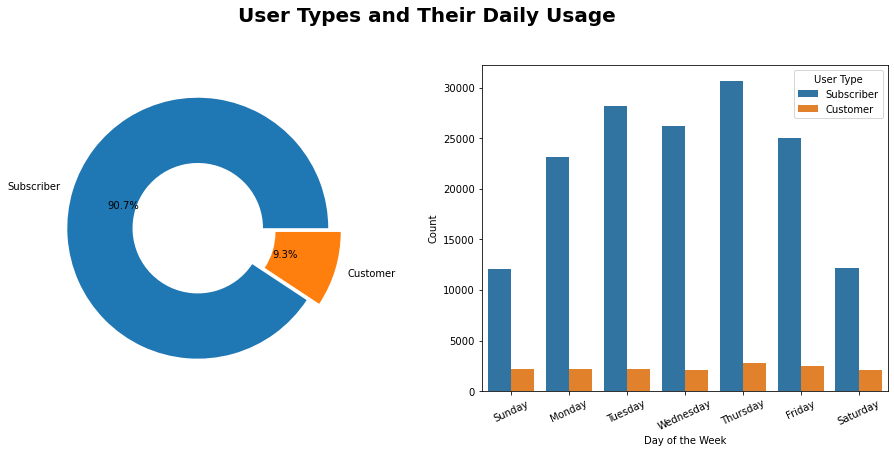

In [7]:
plt.figure(figsize = (16,6))
days=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 
      'Friday', 'Saturday']

plt.subplot(1, 2, 1);
ut = df['user_type'].value_counts()/df.shape[0]
plt.pie(ut, labels= ut.index,autopct= '%1.1f%%', explode=[0, 0.1],
        wedgeprops = {'width' : 0.5})
#plt.axis('square');

plt.subplot(1, 2, 2);
st_day = sb.countplot(data=df, x='start_day', hue='user_type', 
                      hue_order=ut.index, order =days);
st_day.legend(title='User Type');
plt.xticks(rotation=25);
plt.xlabel('Day of the Week');
plt.ylabel('Count');
plt.suptitle('User Types and Their Daily Usage', fontsize=20, 
             fontweight='semibold', y=1.015);
plt.grid(False)

## Customers Daily Bike Trips By Age Group

* The point plot below is a visual depicting a sharp relationship between a Customer and their age group. Customers who fall in the age group between 30-45 years old are the most common age group to use the bike sharing system. The 30-45 years old  age group also lead the spike which occurs across all age groups on Thursdays. 
* Customers who fall in the 15-29 year old age group are the next most common age group to use the bike sharing system, and follow a similar trend at the 30-45 year olds. 
* This figure also illustrate that more bike usage occure on Thursdays than any other day of the week

In [8]:
df.age_group.value_counts()

30 - 45    85513
15 - 29    65086
46 - 59    19482
69 - 70     3561
Name: age_group, dtype: int64

In [9]:
df['age_group'] = df.member_age.apply(lambda x: '15 - 29' if 15<x<=29
                                     else '30 - 45' if 30<=x<=45
                                     else '46 - 59' if 46<=x<=59
                                     else '69 - 70' if 60<=x<=70
                                                       else x)


custom_age = df[df['user_type']
                    == 'Customer'].groupby(['start_day', 
                        'age_group']).agg({'bike_id':'count'}).reset_index()


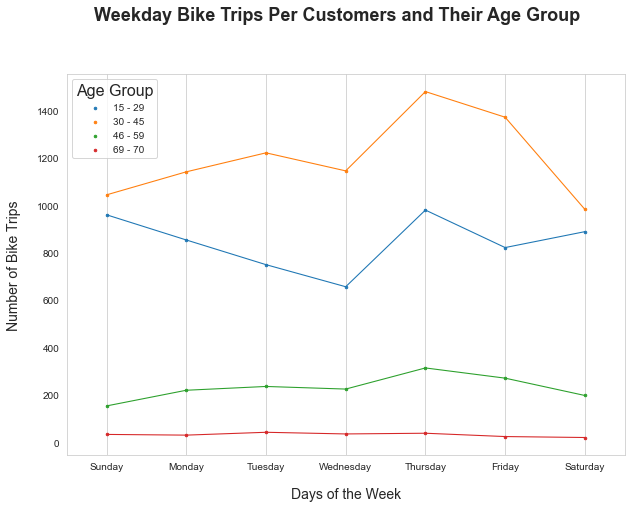

In [10]:
# Comparing daily bike trips per customers, based on their age group 
plt.figure(figsize=[10, 7]);
sb.set_style('whitegrid')


days=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 
      'Friday', 'Saturday']

pt = sb.pointplot(data = custom_age, x='start_day',
            y='bike_id', hue='age_group', scale=.4, order = days);

# Title, labels and legend
plt.xlabel('Days of the Week', labelpad = 16, fontsize =14)
plt.ylabel('Number of Bike Trips', labelpad = 16, fontsize =14)
plt.suptitle('Weekday Bike Trips Per Customers and Their Age Group', 
             fontsize=18, fontweight='semibold', y=1.015);
gend = pt.legend()
gend.set_title('Age Group', prop={'size': 16})

plt.grid()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [11]:
# Use this command if you are running this file in local
!jupyter nbconvert GoBike_Slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook GoBike_Slide_deck.ipynb to slides
[NbConvertApp] Writing 751367 bytes to GoBike_Slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\ssaKAAN\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\ssaKAAN\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\ssaKAAN\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\ssaKAAN\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\ssaKAAN\anaconda3\lib\site-packages\nbconvert\